In [2]:
import MySQLdb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

# MySql connection

In [378]:
myvars = {}
with open("tummalas-mysql-password") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip() 
        
myvars.keys()

conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db='I501Sp22grp11_db')
cursor = conn.cursor()

cursor.execute('select * from DRUG_OVERDOSE');
rows = cursor.fetchall() 

In [379]:
print(len(rows))

5106


# Reading the csv file 

In [79]:
import pandas as pd
df = pd.read_csv('drug overdose.csv', header=1)
df = df.drop(['0', 'Unnamed: 1'], axis=1)
display(df)

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,6/28/14 0:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,3/21/13 0:00,0.0,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,0,0,0,NaN,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,3/13/16 0:00,0.0,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,0,0,0,NaN,0,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,3/31/16 0:00,0.0,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,0,0,0,NaN,0,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,2/13/13 0:00,0.0,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,0,0,0,NaN,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,15-0466,9/8/15 0:00,1.0,43.0,Male,White,CHESHIRE,NEW HAVEN,CT,CHESHIRE,...,0,0,0,NaN,0,0,Accident,"CHESHIRE, CT\n(41.498834, -72.901448)","CHESHIRE, CT\n(41.498834, -72.901448)","CT\n(41.575155, -72.738288)"
5101,17-0618,7/22/17 0:00,1.0,21.0,Male,White,MADISON,NEW HAVEN,CT,NEW HAVEN,...,0,0,0,NaN,0,0,Accident,"New Haven, CT\n(41.308252, -72.924161)","MADISON, CT\n(41.271447, -72.60086)","CT\n(41.575155, -72.738288)"
5102,18-0646,8/14/18 0:00,0.0,30.0,Male,White,LAWRENCEVILLE,TIOGA,PA,DANBURY,...,1,0,0,NaN,0,1,Accident,"DANBURY, CT\n(41.393666, -73.451539)",NaN,"DANBURY, CT\n(41.393666, -73.451539)"
5103,14-0124,3/16/14 0:00,0.0,33.0,Male,White,HARTFORD,NaN,NaN,WINDSOR,...,0,0,0,NaN,0,0,Accident,"WINDSOR, CT\n(41.852781, -72.64379)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)"


# Null value counts

In [5]:
print('Row count     :',df.shape[0])
print('Column count  :',df.shape[1])
print('\nList of Features :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().sum())
print('\nActual values    :',df.notnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Row count     : 5105
Column count  : 41

List of Features :
     : ['ID', 'Date', 'DateType', 'Age', 'Sex', 'Race', 'ResidenceCity', 'ResidenceCounty', 'ResidenceState', 'DeathCity', 'DeathCounty', 'Location', 'LocationifOther', 'DescriptionofInjury', 'InjuryPlace', 'InjuryCity', 'InjuryCounty', 'InjuryState', 'COD', 'OtherSignifican', 'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone', 'Other', 'OpiateNOS', 'AnyOpioid', 'MannerofDeath', 'DeathCityGeo', 'ResidenceCityGeo', 'InjuryCityGeo']

Missing values    : ID                        0
Date                      2
DateType                  2
Age                       3
Sex                       6
Race                     13
ResidenceCity           173
ResidenceCounty         797
ResidenceState         1549
DeathCity                 5
DeathCounty            1100
Location                 24
Lo

In [6]:
# missing  values present in each column
df.isna().sum(axis=0)

ID                        0
Date                      2
DateType                  2
Age                       3
Sex                       6
Race                     13
ResidenceCity           173
ResidenceCounty         797
ResidenceState         1549
DeathCity                 5
DeathCounty            1100
Location                 24
LocationifOther        4515
DescriptionofInjury     780
InjuryPlace              66
InjuryCity             1756
InjuryCounty           2741
InjuryState            3681
COD                       0
OtherSignifican        4936
Heroin                    0
Cocaine                   0
Fentanyl                  0
Fentanyl_Analogue         0
Oxycodone                 0
Oxymorphone               0
Ethanol                   0
Hydrocodone               0
Benzodiazepine            0
Methadone                 0
Amphet                    0
Tramad                    0
Morphine_NotHeroin        0
Hydromorphone             0
Other                  4670
OpiateNOS           

In [7]:
df.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,6/28/14 0:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,3/21/13 0:00,0.0,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,0,0,0,NaN,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,3/13/16 0:00,0.0,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,0,0,0,NaN,0,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,3/31/16 0:00,0.0,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,0,0,0,NaN,0,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,2/13/13 0:00,0.0,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,0,0,0,NaN,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [8]:
nullSeries = df.isna().sum(axis=0)
print(nullSeries[nullSeries != 0])
nullColumns = nullSeries[nullSeries != 0].index.values

Date                      2
DateType                  2
Age                       3
Sex                       6
Race                     13
ResidenceCity           173
ResidenceCounty         797
ResidenceState         1549
DeathCity                 5
DeathCounty            1100
Location                 24
LocationifOther        4515
DescriptionofInjury     780
InjuryPlace              66
InjuryCity             1756
InjuryCounty           2741
InjuryState            3681
OtherSignifican        4936
Other                  4670
MannerofDeath            10
ResidenceCityGeo         93
InjuryCityGeo            78
dtype: int64


# Data Cleaning

In [9]:
df[nullColumns].isna().sum()/df.shape[0]

Date                   0.000392
DateType               0.000392
Age                    0.000588
Sex                    0.001175
Race                   0.002547
ResidenceCity          0.033888
ResidenceCounty        0.156121
ResidenceState         0.303428
DeathCity              0.000979
DeathCounty            0.215475
Location               0.004701
LocationifOther        0.884427
DescriptionofInjury    0.152791
InjuryPlace            0.012929
InjuryCity             0.343976
InjuryCounty           0.536925
InjuryState            0.721058
OtherSignifican        0.966895
Other                  0.914789
MannerofDeath          0.001959
ResidenceCityGeo       0.018217
InjuryCityGeo          0.015279
dtype: float64

In [10]:
df = df.drop(['Date','DateType','LocationifOther', 'InjuryState', 'OtherSignifican', 'Other'], axis=1)
df

,ID,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,DeathCounty,Location,...,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,FAIRFIELD,Hospital,...,0,0,0,0,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,NaN,Hospital,...,0,0,0,0,0,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,NaN,Hospital,...,0,0,0,0,0,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,FAIRFIELD,Hospital,...,0,0,0,0,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,15-0466,43.0,Male,White,CHESHIRE,NEW HAVEN,CT,CHESHIRE,NEW HAVEN,Residence,...,0,0,0,0,0,0,Accident,"CHESHIRE, CT\n(41.498834, -72.901448)","CHESHIRE, CT\n(41.498834, -72.901448)","CT\n(41.575155, -72.738288)"
5101,17-0618,21.0,Male,White,MADISON,NEW HAVEN,CT,NEW HAVEN,NEW HAVEN,Hospital,...,0,0,0,0,0,0,Accident,"New Haven, CT\n(41.308252, -72.924161)","MADISON, CT\n(41.271447, -72.60086)","CT\n(41.575155, -72.738288)"
5102,18-0646,30.0,Male,White,LAWRENCEVILLE,TIOGA,PA,DANBURY,FAIRFIELD,Other,...,0,1,0,0,0,1,Accident,"DANBURY, CT\n(41.393666, -73.451539)",NaN,"DANBURY, CT\n(41.393666, -73.451539)"
5103,14-0124,33.0,Male,White,HARTFORD,NaN,NaN,WINDSOR,NaN,Other,...,0,0,0,0,0,0,Accident,"WINDSOR, CT\n(41.852781, -72.64379)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)"


In [11]:
df.isna().sum(axis=0)

ID                        0
Age                       3
Sex                       6
Race                     13
ResidenceCity           173
ResidenceCounty         797
ResidenceState         1549
DeathCity                 5
DeathCounty            1100
Location                 24
DescriptionofInjury     780
InjuryPlace              66
InjuryCity             1756
InjuryCounty           2741
COD                       0
Heroin                    0
Cocaine                   0
Fentanyl                  0
Fentanyl_Analogue         0
Oxycodone                 0
Oxymorphone               0
Ethanol                   0
Hydrocodone               0
Benzodiazepine            0
Methadone                 0
Amphet                    0
Tramad                    0
Morphine_NotHeroin        0
Hydromorphone             0
OpiateNOS                 0
AnyOpioid                 0
MannerofDeath            10
DeathCityGeo              0
ResidenceCityGeo         93
InjuryCityGeo            78
dtype: int64

In [12]:
age = df['Age'].mean()
age

41.96491571932575

In [13]:
race = df['Race'].mode()
race

0    White
dtype: object

In [14]:
sex = df['Sex'].mode()
sex

0    Male
dtype: object

In [15]:
ResidenceCity = df['ResidenceCity'].mode()
ResidenceCity

0    HARTFORD
dtype: object

In [16]:
ResidenceCounty = df['ResidenceCounty'].mode()
ResidenceCounty

0    HARTFORD
dtype: object

In [17]:
ResidenceState = df['ResidenceState'].mode()
ResidenceState

0    CT
dtype: object

In [18]:
DeathCity = df['DeathCity'].mode()
DeathCity


0    HARTFORD
dtype: object

In [19]:
DeathCounty = df['DeathCounty'].mode()
DeathCounty

0    HARTFORD
dtype: object

In [20]:
Location = df['Location'].mode()
Location

0    Residence
dtype: object

In [21]:
DescriptionofInjury = df['DescriptionofInjury'].mode()
DescriptionofInjury

0    Substance Abuse
dtype: object

In [22]:
InjuryPlace = df['InjuryPlace'].mode()
InjuryPlace

0    Residence
dtype: object

In [23]:
InjuryCity = df['InjuryCity'].mode()
InjuryCity

0    HARTFORD
dtype: object

In [24]:
InjuryCounty = df['InjuryCounty'].mode()
InjuryCounty

0    HARTFORD
dtype: object

In [25]:
MannerofDeath = df['MannerofDeath'].mode()
MannerofDeath

0    Accident
dtype: object

In [26]:
ResidenceCityGeo = df['ResidenceCityGeo'].mode()
ResidenceCityGeo

0    HARTFORD, CT\n(41.765775, -72.673356)
dtype: object

In [27]:
InjuryCityGeo = df['InjuryCityGeo'].mode()
InjuryCityGeo

0    CT\n(41.575155, -72.738288)
dtype: object

In [28]:
df ['Age'] = df['Age'].fillna('41.96491571932575')
df ['Race'] = df['Race'].fillna('White')
df ['Sex'] = df['Sex'].fillna('Male')
df ['ResidenceCity'] = df['ResidenceCity'].fillna('HARTFORD')
df ['ResidenceCounty'] = df['ResidenceCounty'].fillna('HARTFORD')
df ['ResidenceState'] = df['ResidenceState'].fillna('CT')
df ['DeathCity'] = df['DeathCity'].fillna('HARTFORD')
df ['DeathCounty'] = df['DeathCounty'].fillna('HARTFORD')
df ['Location'] = df['Location'].fillna('Residence')
df ['DescriptionofInjury'] = df['DescriptionofInjury'].fillna('Substance Abuse')
df ['InjuryPlace'] = df['InjuryPlace'].fillna('Residence')
df ['InjuryCity'] = df['InjuryCity'].fillna('HARTFORD')
df ['InjuryCounty'] = df['InjuryCounty'].fillna('HARTFORD')
df ['MannerofDeath'] = df['MannerofDeath'].fillna('Accident')
df ['ResidenceCityGeo'] = df['ResidenceCityGeo'].fillna('HARTFORD, CT\n(41.765775, -72.673356)')
df ['InjuryCityGeo'] = df['InjuryCityGeo'].fillna('CT\n(41.575155, -72.738288)')



In [29]:
df.isna().sum(axis=0)

ID                     0
Age                    0
Sex                    0
Race                   0
ResidenceCity          0
ResidenceCounty        0
ResidenceState         0
DeathCity              0
DeathCounty            0
Location               0
DescriptionofInjury    0
InjuryPlace            0
InjuryCity             0
InjuryCounty           0
COD                    0
Heroin                 0
Cocaine                0
Fentanyl               0
Fentanyl_Analogue      0
Oxycodone              0
Oxymorphone            0
Ethanol                0
Hydrocodone            0
Benzodiazepine         0
Methadone              0
Amphet                 0
Tramad                 0
Morphine_NotHeroin     0
Hydromorphone          0
OpiateNOS              0
AnyOpioid              0
MannerofDeath          0
DeathCityGeo           0
ResidenceCityGeo       0
InjuryCityGeo          0
dtype: int64

# Grouping of description of injury

In [30]:
df.DescriptionofInjury = df.DescriptionofInjury.str.lower()

df['DescriptionofInjury_others'] = df.DescriptionofInjury
counts = df.DescriptionofInjury.value_counts()
idx = counts[counts.lt(11)].index

df['counts'] = df['DescriptionofInjury'].map(counts)
df.loc[df['DescriptionofInjury'].isin(idx), 'DescriptionofInjury_others'] = 'others'
df.loc[df['DescriptionofInjury_others'].isin(['substance', 'drug use', 'drug abuse', 'used heroin', 'acute and chronic substance abuse', 'used cocaine', 'used opiates', 'heroin use', 'used oxycodone']), 'DescriptionofInjury_others'] = 'substance abuse'
df.loc[df['DescriptionofInjury_others'].isin(['ingested medications', 'took medications', 'used medications']), 'DescriptionofInjury_others'] = 'prescription medicine abuse'
df.head()

,ID,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,DeathCounty,Location,...,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo,DescriptionofInjury_others,counts
0,14-0273,41.96491571932575,Male,White,HARTFORD,HARTFORD,CT,HARTFORD,HARTFORD,Residence,...,0,0,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)",others,1
1,13-0102,48.0,Male,Black,NORWALK,HARTFORD,CT,NORWALK,FAIRFIELD,Hospital,...,0,0,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)",substance abuse,3164
2,16-0165,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,HARTFORD,Hospital,...,0,0,0,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)","CT\n(41.575155, -72.738288)",substance abuse,3164
3,16-0208,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,HARTFORD,Hospital,...,0,0,0,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)",substance abuse,3164
4,13-0052,22.0,Male,"Asian, Other",FLUSHING,QUEENS,CT,GREENWICH,FAIRFIELD,Hospital,...,0,0,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)",others,1


# Label Encoding od description of injury

In [31]:
df['DescriptionofInjury_others'].value_counts()

substance abuse                4013
others                          401
ingestion                       344
injection                       160
inhalation                      113
prescription medicine abuse      54
multiple drug use                20
Name: DescriptionofInjury_others, dtype: int64

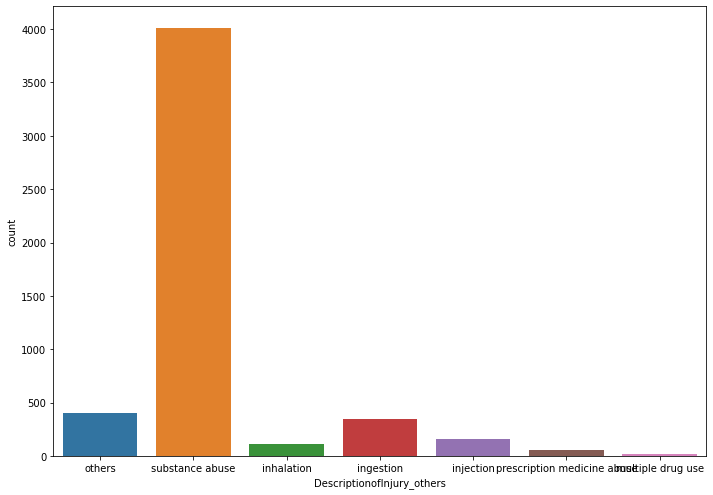

In [32]:
import seaborn as sns
sns.countplot(df['DescriptionofInjury_others'])
rcParams['figure.figsize'] = 11.7,8.27

plt.show()

In [33]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['DescriptionofInjury_others']= label_encoder.fit_transform(df['DescriptionofInjury_others'])
 
df.head()

,ID,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,DeathCounty,Location,...,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo,DescriptionofInjury_others,counts
0,14-0273,41.96491571932575,Male,White,HARTFORD,HARTFORD,CT,HARTFORD,HARTFORD,Residence,...,0,0,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)",4,1
1,13-0102,48.0,Male,Black,NORWALK,HARTFORD,CT,NORWALK,FAIRFIELD,Hospital,...,0,0,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)",6,3164
2,16-0165,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,HARTFORD,Hospital,...,0,0,0,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)","CT\n(41.575155, -72.738288)",6,3164
3,16-0208,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,HARTFORD,Hospital,...,0,0,0,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)",6,3164
4,13-0052,22.0,Male,"Asian, Other",FLUSHING,QUEENS,CT,GREENWICH,FAIRFIELD,Hospital,...,0,0,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)",4,1


In [34]:
#residence city label encoding

In [35]:
df['ResidenceCity_others'] = df.ResidenceCity
counts = df.ResidenceCity.value_counts()
idx = counts[counts.lt(200)].index

df['counts'] = df['ResidenceCity'].map(counts)
df.loc[df['ResidenceCity'].isin(idx), 'ResidenceCity_others'] = 'others'

In [36]:
df['ResidenceCity_others'].value_counts()

others        3902
HARTFORD       469
WATERBURY      269
BRIDGEPORT     241
NEW HAVEN      224
Name: ResidenceCity_others, dtype: int64

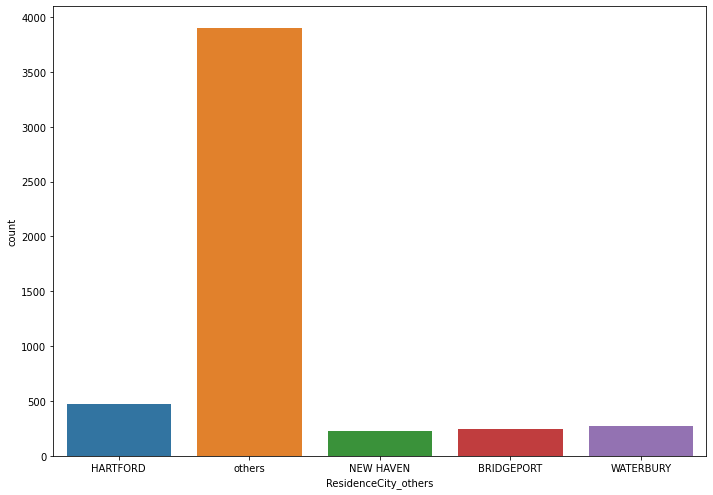

In [37]:
import seaborn as sns
sns.countplot(df['ResidenceCity_others'])


plt.show()

In [38]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['ResidenceCity_others']= label_encoder.fit_transform(df['ResidenceCity_others'])
 
df.head()

,ID,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,DeathCounty,Location,...,Hydromorphone,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo,DescriptionofInjury_others,counts,ResidenceCity_others
0,14-0273,41.96491571932575,Male,White,HARTFORD,HARTFORD,CT,HARTFORD,HARTFORD,Residence,...,0,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)",4,469,1
1,13-0102,48.0,Male,Black,NORWALK,HARTFORD,CT,NORWALK,FAIRFIELD,Hospital,...,0,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)",6,57,4
2,16-0165,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,HARTFORD,Hospital,...,0,0,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)","CT\n(41.575155, -72.738288)",6,5,4
3,16-0208,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,HARTFORD,Hospital,...,0,0,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)",6,3,4
4,13-0052,22.0,Male,"Asian, Other",FLUSHING,QUEENS,CT,GREENWICH,FAIRFIELD,Hospital,...,0,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)",4,1,4


In [39]:
# label encoding for geneder

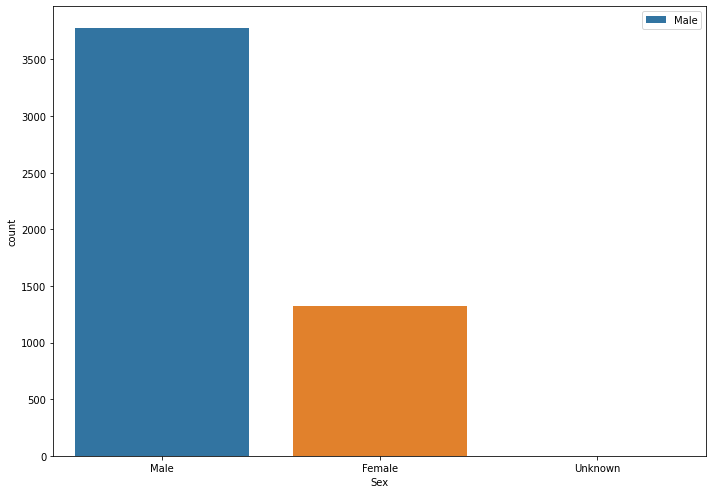

In [40]:
import seaborn as sns
sns.countplot(df['Sex'])
plt.legend(labels = ['Male','Female', 'Unknown'])
plt.show()


In [41]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Sex']= label_encoder.fit_transform(df['Sex'])
 
df.head()

,ID,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,DeathCounty,Location,...,Hydromorphone,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo,DescriptionofInjury_others,counts,ResidenceCity_others
0,14-0273,41.96491571932575,1,White,HARTFORD,HARTFORD,CT,HARTFORD,HARTFORD,Residence,...,0,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)",4,469,1
1,13-0102,48.0,1,Black,NORWALK,HARTFORD,CT,NORWALK,FAIRFIELD,Hospital,...,0,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)",6,57,4
2,16-0165,30.0,0,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,HARTFORD,Hospital,...,0,0,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)","CT\n(41.575155, -72.738288)",6,5,4
3,16-0208,23.0,1,White,RYE,WESTCHESTER,NY,GREENWICH,HARTFORD,Hospital,...,0,0,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)",6,3,4
4,13-0052,22.0,1,"Asian, Other",FLUSHING,QUEENS,CT,GREENWICH,FAIRFIELD,Hospital,...,0,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)",4,1,4


In [42]:
# Label encoding for Residence County

In [43]:
df['ResidenceCounty'].value_counts()

HARTFORD      2002
NEW HAVEN     1127
FAIRFIELD      680
NEW LONDON     406
LITCHFIELD     262
              ... 
MOULTRIE         1
PLYMOUTH         1
NEW CASTLE       1
HIGHLANDS        1
TIOGA            1
Name: ResidenceCounty, Length: 84, dtype: int64

In [44]:
df['ResidenceCounty_others'] = df.ResidenceCounty
counts = df.ResidenceCounty.value_counts()
idx = counts[counts.lt(250)].index

df['counts'] = df['ResidenceCounty'].map(counts)
df.loc[df['ResidenceCounty'].isin(idx), 'ResidenceCounty_others'] = 'others'

In [45]:
df['ResidenceCounty_others'].value_counts()

HARTFORD      2002
NEW HAVEN     1127
FAIRFIELD      680
others         628
NEW LONDON     406
LITCHFIELD     262
Name: ResidenceCounty_others, dtype: int64

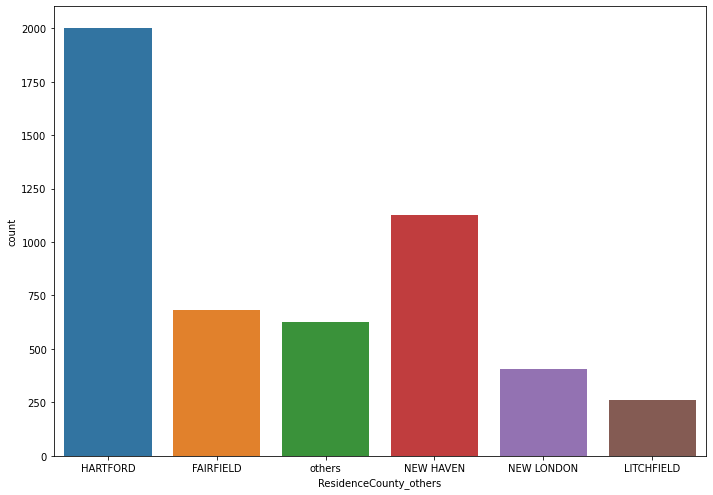

In [46]:
import seaborn as sns
sns.countplot(df['ResidenceCounty_others'])
plt.show()

In [47]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['ResidenceCounty_others']= label_encoder.fit_transform(df['ResidenceCounty_others'])
 
df.head()

,ID,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,DeathCounty,Location,...,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo,DescriptionofInjury_others,counts,ResidenceCity_others,ResidenceCounty_others
0,14-0273,41.96491571932575,1,White,HARTFORD,HARTFORD,CT,HARTFORD,HARTFORD,Residence,...,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)",4,2002,1,1
1,13-0102,48.0,1,Black,NORWALK,HARTFORD,CT,NORWALK,FAIRFIELD,Hospital,...,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)",6,2002,4,1
2,16-0165,30.0,0,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,HARTFORD,Hospital,...,0,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)","CT\n(41.575155, -72.738288)",6,680,4,0
3,16-0208,23.0,1,White,RYE,WESTCHESTER,NY,GREENWICH,HARTFORD,Hospital,...,0,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)",6,15,4,5
4,13-0052,22.0,1,"Asian, Other",FLUSHING,QUEENS,CT,GREENWICH,FAIRFIELD,Hospital,...,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)",4,2,4,5


In [48]:
# Label encoder for Location

In [49]:
df['Location'].value_counts()

Residence            2701
Hospital             1626
Other                 773
Convalescent Home       3
Nursing Home            1
Hospice                 1
Name: Location, dtype: int64

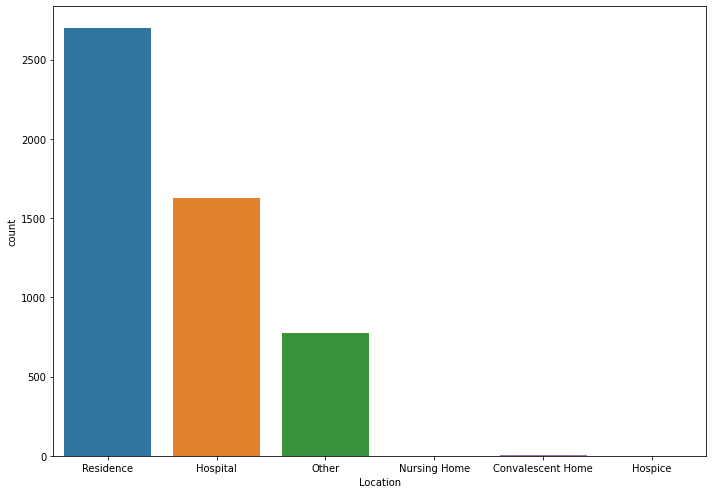

In [50]:
import seaborn as sns
sns.countplot(df['Location'])
plt.show()

In [51]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Location']= label_encoder.fit_transform(df['Location'])

df.head()

,ID,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,DeathCounty,Location,...,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo,DescriptionofInjury_others,counts,ResidenceCity_others,ResidenceCounty_others
0,14-0273,41.96491571932575,1,White,HARTFORD,HARTFORD,CT,HARTFORD,HARTFORD,5,...,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)",4,2002,1,1
1,13-0102,48.0,1,Black,NORWALK,HARTFORD,CT,NORWALK,FAIRFIELD,2,...,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)",6,2002,4,1
2,16-0165,30.0,0,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,HARTFORD,2,...,0,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)","CT\n(41.575155, -72.738288)",6,680,4,0
3,16-0208,23.0,1,White,RYE,WESTCHESTER,NY,GREENWICH,HARTFORD,2,...,0,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)",6,15,4,5
4,13-0052,22.0,1,"Asian, Other",FLUSHING,QUEENS,CT,GREENWICH,FAIRFIELD,2,...,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)",4,2,4,5


In [52]:
#label encoding for COD

In [53]:
df['COD'] = df.COD
counts = df.COD.value_counts()
idx = counts[counts.lt(90)].index

df['counts'] = df['COD'].map(counts)
df.loc[df['COD'].isin(idx), 'COD'] = 'others'


In [54]:
df['COD'].value_counts()

others                         4375
Acute Fentanyl Intoxication     168
Multiple Drug Toxicity          131
Heroin Intoxication             130
Acute Heroin Intoxication       116
Heroin Toxicity                  95
Acute Heroin Toxicity            90
Name: COD, dtype: int64

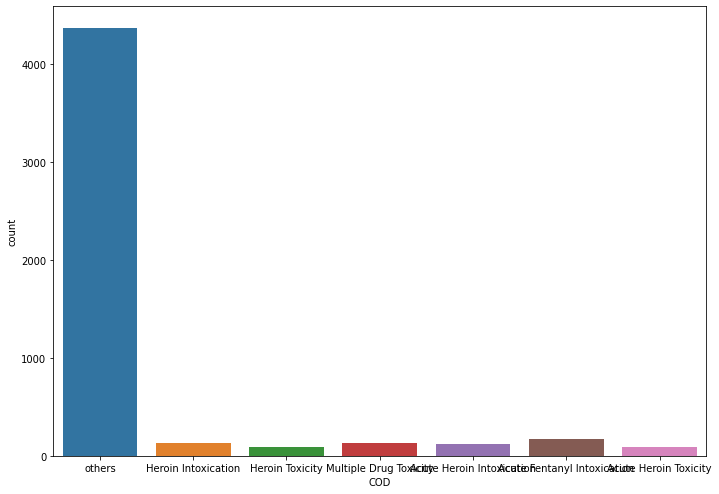

In [55]:
import seaborn as sns
sns.countplot(df['COD'])
plt.show()

In [56]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['COD']= label_encoder.fit_transform(df['COD'])



# Label encoding of DeathCity

In [58]:
df['DeathCity'].value_counts()

HARTFORD         568
NEW HAVEN        374
WATERBURY        368
BRIDGEPORT       341
NEW BRITAIN      227
                ... 
EAST HARTLAND      1
BANTAM             1
BRIDGEWATER        1
W HAVEN            1
NORFOLK            1
Name: DeathCity, Length: 222, dtype: int64

In [59]:
df['DeathCity'] = df.DeathCity
counts = df.DeathCity.value_counts()
idx = counts[counts.lt(100)].index

df['counts'] = df['DeathCity'].map(counts)
df.loc[df['DeathCity'].isin(idx), 'DeathCity'] = 'others'


In [60]:
df['DeathCity'].value_counts()

others         2210
HARTFORD        568
NEW HAVEN       374
WATERBURY       368
BRIDGEPORT      341
NEW BRITAIN     227
MERIDEN         145
BRISTOL         144
NORWICH         144
NEW LONDON      137
DANBURY         131
TORRINGTON      114
MANCHESTER      102
MIDDLETOWN      100
Name: DeathCity, dtype: int64

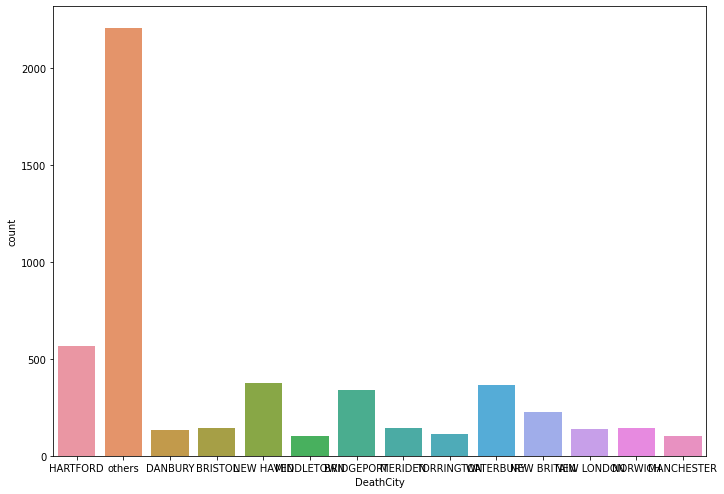

In [61]:
import seaborn as sns
sns.countplot(df['DeathCity'])
plt.show()

In [62]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['DeathCity']= label_encoder.fit_transform(df['DeathCity'])
df.head()

,ID,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,DeathCounty,Location,...,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo,DescriptionofInjury_others,counts,ResidenceCity_others,ResidenceCounty_others
0,14-0273,41.96491571932575,1,White,HARTFORD,HARTFORD,CT,3,HARTFORD,5,...,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)",4,568,1,1
1,13-0102,48.0,1,Black,NORWALK,HARTFORD,CT,13,FAIRFIELD,2,...,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)",6,69,4,1
2,16-0165,30.0,0,White,SANDY HOOK,FAIRFIELD,CT,2,HARTFORD,2,...,0,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)","CT\n(41.575155, -72.738288)",6,131,4,0
3,16-0208,23.0,1,White,RYE,WESTCHESTER,NY,13,HARTFORD,2,...,0,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)",6,22,4,5
4,13-0052,22.0,1,"Asian, Other",FLUSHING,QUEENS,CT,13,FAIRFIELD,2,...,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)",4,22,4,5


In [63]:
# the data is not normally distributed- non parametric tests are recomended

In [64]:
#test for correlation

In [65]:
df_correlation_copy = df.copy(deep= True)
df_correlation_copy

,ID,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,DeathCounty,Location,...,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo,DescriptionofInjury_others,counts,ResidenceCity_others,ResidenceCounty_others
0,14-0273,41.96491571932575,1,White,HARTFORD,HARTFORD,CT,3,HARTFORD,5,...,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)",4,568,1,1
1,13-0102,48.0,1,Black,NORWALK,HARTFORD,CT,13,FAIRFIELD,2,...,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)",6,69,4,1
2,16-0165,30.0,0,White,SANDY HOOK,FAIRFIELD,CT,2,HARTFORD,2,...,0,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)","CT\n(41.575155, -72.738288)",6,131,4,0
3,16-0208,23.0,1,White,RYE,WESTCHESTER,NY,13,HARTFORD,2,...,0,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)",6,22,4,5
4,13-0052,22.0,1,"Asian, Other",FLUSHING,QUEENS,CT,13,FAIRFIELD,2,...,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)",4,22,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,15-0466,43.0,1,White,CHESHIRE,NEW HAVEN,CT,13,NEW HAVEN,5,...,0,0,Accident,"CHESHIRE, CT\n(41.498834, -72.901448)","CHESHIRE, CT\n(41.498834, -72.901448)","CT\n(41.575155, -72.738288)",6,8,4,3
5101,17-0618,21.0,1,White,MADISON,NEW HAVEN,CT,8,NEW HAVEN,2,...,0,0,Accident,"New Haven, CT\n(41.308252, -72.924161)","MADISON, CT\n(41.271447, -72.60086)","CT\n(41.575155, -72.738288)",6,374,4,3
5102,18-0646,30.0,1,White,LAWRENCEVILLE,TIOGA,PA,2,FAIRFIELD,4,...,0,1,Accident,"DANBURY, CT\n(41.393666, -73.451539)","HARTFORD, CT\n(41.765775, -72.673356)","DANBURY, CT\n(41.393666, -73.451539)",6,131,4,5
5103,14-0124,33.0,1,White,HARTFORD,HARTFORD,CT,13,HARTFORD,4,...,0,0,Accident,"WINDSOR, CT\n(41.852781, -72.64379)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)",6,24,1,1


In [66]:
df_correlation = df_correlation_copy.corr(method = 'spearman')
df_correlation

,Sex,DeathCity,Location,COD,Heroin,Cocaine,Fentanyl_Analogue,Oxycodone,Oxymorphone,Ethanol,...,Benzodiazepine,Methadone,Amphet,Tramad,Hydromorphone,OpiateNOS,DescriptionofInjury_others,counts,ResidenceCity_others,ResidenceCounty_others
Sex,1.000000,0.011318,0.015464,-0.058426,0.104544,0.013236,0.031829,-0.063198,-0.021677,0.051431,...,-0.116265,-0.054326,-0.017367,-0.032708,-0.011352,-0.031474,0.101669,-0.002802,-0.009843,0.001030
DeathCity,0.011318,1.000000,0.318960,-0.018098,-0.012572,-0.078987,0.008619,0.093286,0.049758,0.009028,...,0.078505,-0.007498,0.034390,0.003570,0.029808,-0.032735,-0.041330,-0.784529,0.419897,0.287598
Location,0.015464,0.318960,1.000000,-0.004218,-0.023087,-0.067473,-0.007989,0.081811,0.030875,0.008483,...,0.066047,0.031649,0.012679,-0.001373,0.017736,-0.049325,-0.002957,-0.384237,0.079581,0.015358
COD,-0.058426,-0.018098,-0.004218,1.000000,-0.128955,0.222853,0.116868,0.088679,-0.005140,0.187714,...,0.191725,0.101364,0.058797,0.047039,0.028546,0.053892,0.094420,0.029606,-0.047020,-0.003472
Heroin,0.104544,-0.012572,-0.023087,-0.128955,1.000000,-0.002140,-0.009908,-0.224786,-0.112995,-0.025313,...,-0.104391,-0.125301,-0.003988,-0.038304,-0.002160,-0.131226,0.196038,0.020339,-0.018789,-0.030425
Cocaine,0.013236,-0.078987,-0.067473,0.222853,-0.002140,1.000000,0.038905,-0.116250,-0.063032,-0.044395,...,-0.127564,-0.062315,0.004012,-0.040055,-0.021159,-0.056662,0.174189,0.104104,-0.133426,-0.010076
Fentanyl_Analogue,0.031829,0.008619,-0.007989,0.116868,-0.009908,0.038905,1.000000,-0.053041,-0.037092,0.006837,...,0.007820,-0.028285,0.025009,0.005127,-0.009571,-0.038037,0.141972,-0.000529,-0.024666,0.026097
Oxycodone,-0.063198,0.093286,0.081811,0.088679,-0.224786,-0.116250,-0.053041,1.000000,0.320290,0.005251,...,0.136506,-0.040371,-0.006639,0.005926,0.034915,0.030393,-0.224015,-0.096487,0.075364,0.016264
Oxymorphone,-0.021677,0.049758,0.030875,-0.005140,-0.112995,-0.063032,-0.037092,0.320290,1.000000,0.001961,...,0.066741,-0.004821,0.004986,-0.006483,0.009186,-0.009012,-0.140050,-0.057943,0.044701,-0.019388
Ethanol,0.051431,0.009028,0.008483,0.187714,-0.025313,-0.044395,0.006837,0.005251,0.001961,1.000000,...,-0.004199,-0.037363,-0.031072,0.003603,-0.026821,-0.012245,0.013043,-0.005827,-0.018836,-0.030202


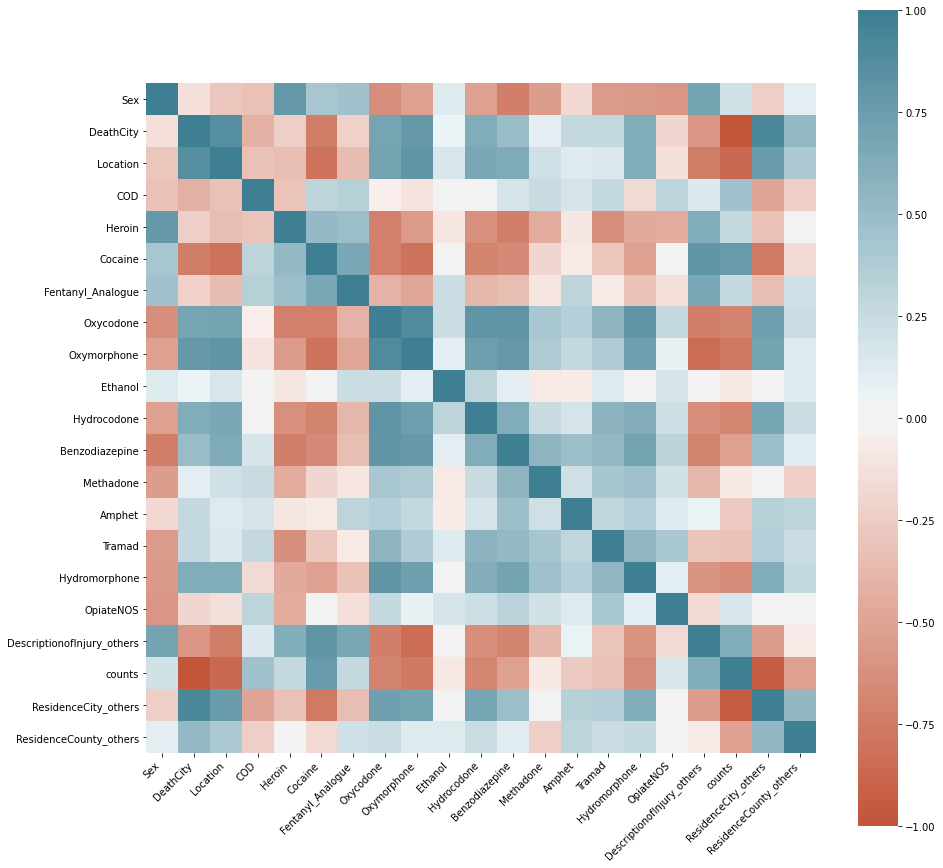

In [67]:
df_correlation = df_correlation.corr(method = 'spearman')

plt.figure(figsize=(15,15))
df_heatmap = sns.heatmap(df_correlation, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
df_heatmap.set_xticklabels(df_heatmap.get_xticklabels(), rotation=45, horizontalalignment='right');


# Kruskal Wallis Test

In [69]:
df_cod = df['COD']
df_deathcity = df['DeathCity']
df_doi = df['DescriptionofInjury_others']

stats.kruskal (df_cod, df_deathcity)

KruskalResult(statistic=1801.3392242395826, pvalue=0.0)

In [70]:
stats.kruskal (df_cod,df_doi)

KruskalResult(statistic=91.34989416660022, pvalue=1.2038654593905812e-21)

# Wilcoxon Signed Rank Test

In [71]:
scipy.stats.wilcoxon (df_cod,df_deathcity)

WilcoxonResult(statistic=1839207.5, pvalue=0.0)

In [72]:
scipy.stats.wilcoxon (df_cod,df_doi)

WilcoxonResult(statistic=474401.0, pvalue=8.763731517317413e-18)

# ANOVA

In [76]:
scipy.stats.f_oneway(df_cod,df_deathcity,df_doi)

F_onewayResult(statistic=2456.4912688472705, pvalue=0.0)

In [451]:
def add_class(row):
    if row['Amphet'] == 1:
        return 'Non-opiods'
    else:
        return 'Opiods'

In [452]:
df['PharmacologicalClass'] = df.apply(lambda row: add_class(row), axis=1)

In [453]:
df.PharmacologicalClass.value_counts()

Opiods        4946
Non-opiods     159
Name: PharmacologicalClass, dtype: int64

In [459]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['PharmacologicalClass']= label_encoder.fit_transform(df['PharmacologicalClass'])

df.head()

,ID,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,DeathCounty,Location,...,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo,DescriptionofInjury_others,counts,ResidenceCity_others,ResidenceCounty_others,PharmacologicalClass
0,14-0273,41.96491571932575,1,White,HARTFORD,HARTFORD,CT,3,HARTFORD,5,...,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)",4,568,1,1,1
1,13-0102,48.0,1,Black,NORWALK,HARTFORD,CT,13,FAIRFIELD,2,...,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)",6,69,4,1,1
2,16-0165,30.0,0,White,SANDY HOOK,FAIRFIELD,CT,2,HARTFORD,2,...,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)","CT\n(41.575155, -72.738288)",6,131,4,0,1
3,16-0208,23.0,1,White,RYE,WESTCHESTER,NY,13,HARTFORD,2,...,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)",6,22,4,5,1
4,13-0052,22.0,1,"Asian, Other",FLUSHING,QUEENS,CT,13,FAIRFIELD,2,...,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)",4,22,4,5,1


In [460]:
#Modelling- Classification

In [461]:
X = df[['Age', 'Sex','ResidenceCity_others','ResidenceCounty_others','Location','COD','DeathCity','PharmacologicalClass']]
y = df['DescriptionofInjury_others']

In [462]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Logistic regression

In [464]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(class_weight="balanced")

from sklearn.model_selection import cross_validate
cv_results = cross_validate(logReg, X, y, cv=10)
cv_results

logReg.fit(X_train, y_train)

logReg_predicted = logReg.predict(X_test)
logReg_expected = y_test
score = logReg.score(X_test, y_test)
print(score)

/home/students/tummalas/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/students/tummalas/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

0.24745497259201252


/home/students/tummalas/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [465]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logReg_predicted))

              precision    recall  f1-score   support

           0       0.12      0.09      0.10        99
           1       0.02      0.12      0.03        24
           2       0.14      0.44      0.21        41
           3       0.00      0.50      0.01         2
           4       0.09      0.13      0.10       102
           5       0.03      0.36      0.05        14
           6       0.84      0.27      0.41       995

    accuracy                           0.25      1277
   macro avg       0.18      0.27      0.13      1277
weighted avg       0.68      0.25      0.34      1277



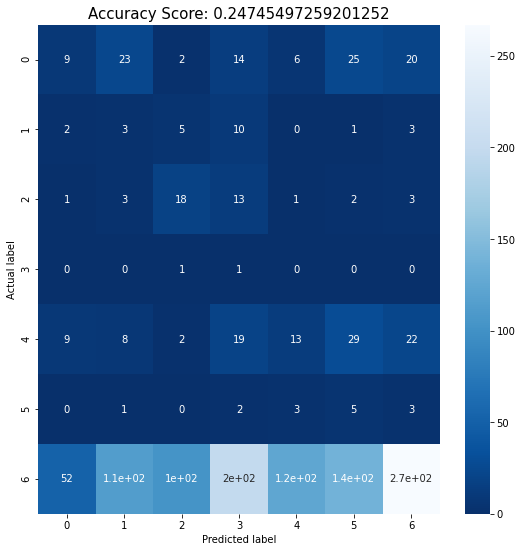

In [466]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, logReg_predicted)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

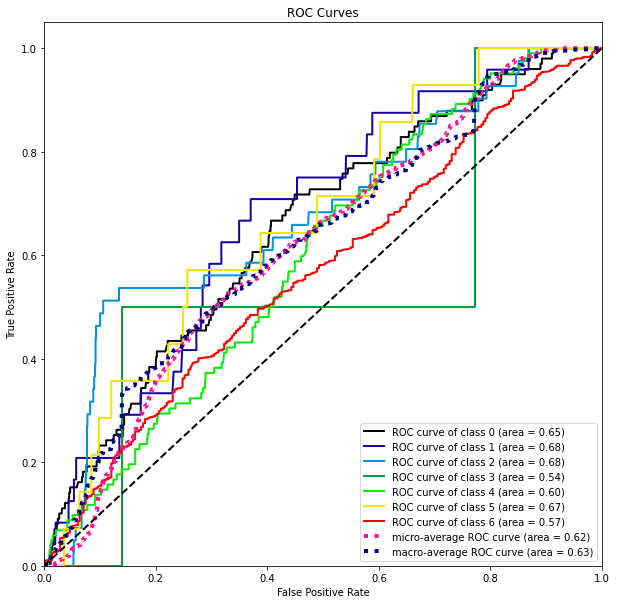

In [467]:
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas = logReg.predict_proba(X_test)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(logReg_expected, predicted_probas)

plt.show()

# Random Forest

In [469]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(max_depth=2, random_state=0, class_weight="balanced")

from sklearn.model_selection import cross_validate
cv_results = cross_validate(randomforest, X, y, cv=10)
cv_results

randomforest.fit(X_train, y_train)

randomforest_predicted = randomforest.predict(X_test)
randomforest_expected = y_test
score = randomforest.score(X_test, y_test)
print(score)


0.1096319498825372


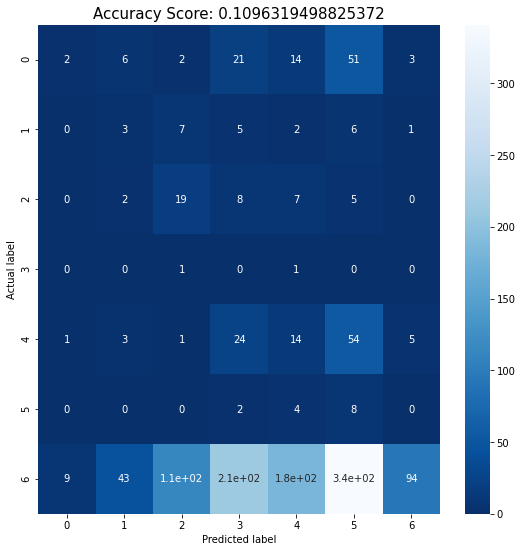

In [470]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, randomforest_predicted)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

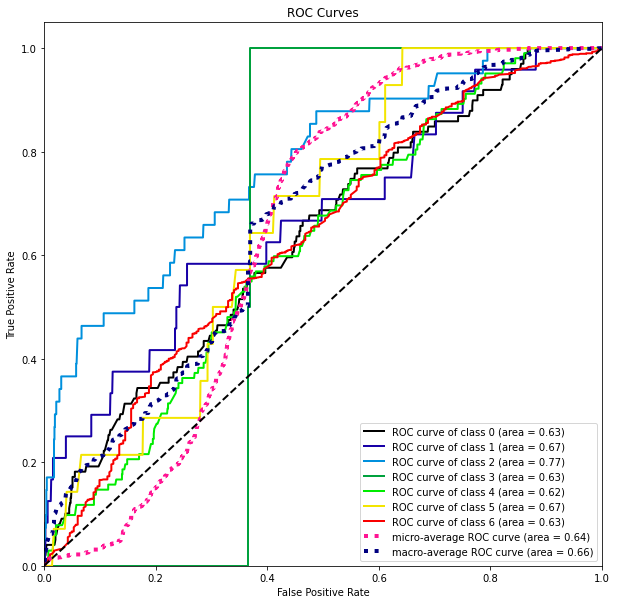

In [471]:
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas = randomforest.predict_proba(X_test)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(randomforest_expected, predicted_probas)

plt.show()

# Support Vector Machine

In [506]:
from sklearn.svm import SVC
svm_class = SVC(gamma='auto',class_weight="balanced", probability=True)

from sklearn.model_selection import cross_validate
cv_results = cross_validate(svm_class, X, y, cv=10)
cv_results

svm_class.fit(X_train, y_train)

svm_predicted = svm_class.predict(X_test)
svm_expected = y_test
score = svm_class.score(X_test, y_test)
print(score)

/home/students/tummalas/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/students/tummalas/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/students/tummalas/.local/lib/python3.8/site-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/home/students/tummalas/.local/lib/python3.8/site-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, 

0.35160532498042285


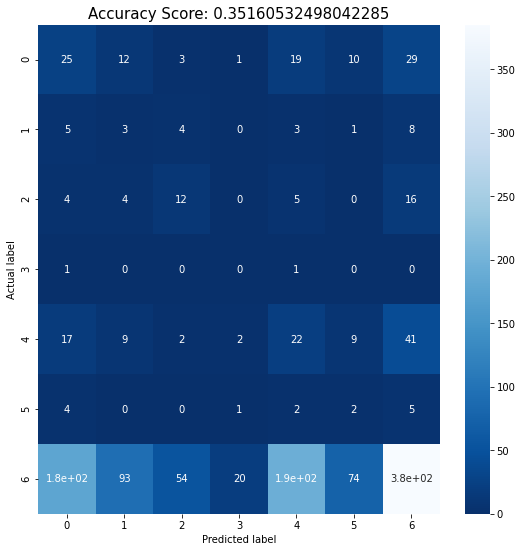

In [507]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, svm_predicted)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

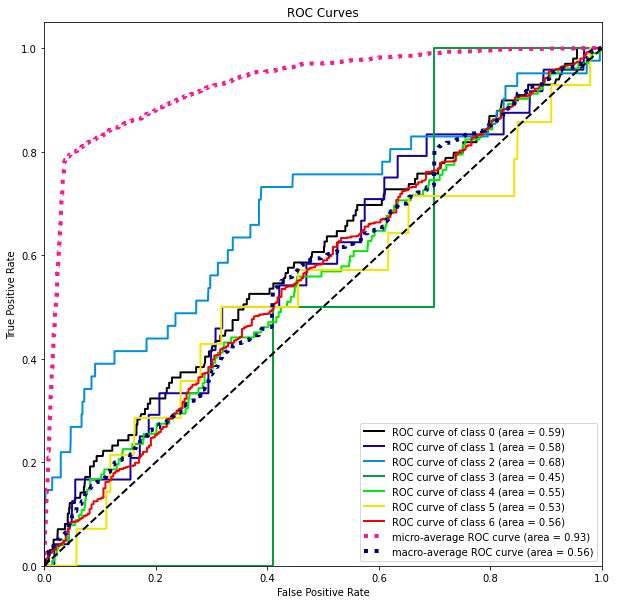

In [508]:
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas = svm_class.predict_proba(X_test)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(svm_expected, predicted_probas)

plt.show()

# Decision Tree

In [474]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(class_weight="balanced")

from sklearn.model_selection import cross_validate
cv_results = cross_validate(dtc, X, y, cv=10)
cv_results

dtc.fit(X_train, y_train)


dtc_predicted = dtc.predict(X_test)
dtc_expected = y_test
score = dtc.score(X_test, y_test)
print(score)

0.6084573218480814


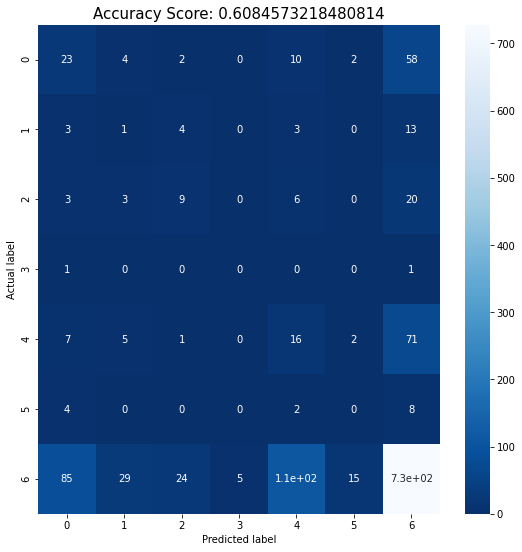

In [475]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, dtc_predicted)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

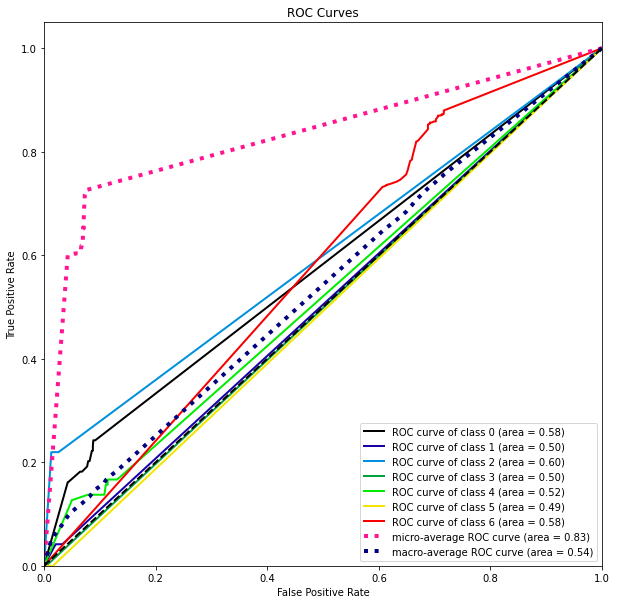

In [476]:
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas = dtc.predict_proba(X_test)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(dtc_expected, predicted_probas)

plt.show()

In [ ]:
#Classification Performance of the models

In [477]:
logReg_matches = (logReg_predicted == logReg_expected)
print(logReg_matches.sum())
print(len(logReg_matches))
print("Overall Accuracy for Logistic Regression = ", logReg_matches.sum()/float(len(logReg_matches)))

randomforest_matches = (randomforest_predicted == randomforest_expected)
print("Overall Accuracy for RFC = ", randomforest_matches.sum()/float(len(randomforest_matches)))

svm_matches = (svm_predicted == svm_expected)
print("Overall Accuracy for SVM_classifier = ", svm_matches.sum()/float(len(svm_matches)))


dtc_matches = (dtc_predicted == dtc_expected)
print("Overall Accuracy for DecisonTree_classifier = ", dtc_matches.sum()/float(len(dtc_matches)))


316
1277
Overall Accuracy for Logistic Regression =  0.24745497259201252
Overall Accuracy for RFC =  0.1096319498825372
Overall Accuracy for SVM_classifier =  0.3644933228593873
Overall Accuracy for DecisonTree_classifier =  0.6084573218480814


In [478]:
from sklearn import metrics
print(metrics.classification_report(logReg_expected, logReg_predicted))
print(metrics.classification_report(randomforest_expected, randomforest_predicted))
print(metrics.classification_report(svm_expected, svm_predicted))
print(metrics.classification_report(dtc_expected, dtc_predicted))


              precision    recall  f1-score   support

           0       0.12      0.09      0.10        99
           1       0.02      0.12      0.03        24
           2       0.14      0.44      0.21        41
           3       0.00      0.50      0.01         2
           4       0.09      0.13      0.10       102
           5       0.03      0.36      0.05        14
           6       0.84      0.27      0.41       995

    accuracy                           0.25      1277
   macro avg       0.18      0.27      0.13      1277
weighted avg       0.68      0.25      0.34      1277

              precision    recall  f1-score   support

           0       0.17      0.02      0.04        99
           1       0.05      0.12      0.07        24
           2       0.13      0.46      0.21        41
           3       0.00      0.00      0.00         2
           4       0.06      0.14      0.09       102
           5       0.02      0.57      0.03        14
           6       0.91 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test
print("RMSE: %s" % np.sqrt(np.mean((predicted - expected) ** 2))) 

In [ ]:
def rSquared(observed, predicted):
    error = ((predicted - observed)**2).sum()
    meanError= error/len(observed)
    return 1 - (meanError/np.var(observed))
print('R-squared = ', rSquared(X,y))


# Clustering

In [479]:
df[['Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue',
       'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine',
       'Methadone', 'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone',
       'OpiateNOS', 'AnyOpioid']]

,Heroin,Cocaine,Fentanyl,Fentanyl_Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid
0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
5101,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5102,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1
5103,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [493]:
df.PharmacologicalClass

0       1
1       1
2       1
3       1
4       1
       ..
5100    1
5101    1
5102    1
5103    1
5104    1
Name: PharmacologicalClass, Length: 5091, dtype: int64

In [494]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)

In [495]:
df_cols = df[['Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue',
       'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine',
       'Methadone', 'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone',
       'OpiateNOS', 'AnyOpioid']].values

In [496]:
df_cols

array([[0, 0, '1', ..., 0, 0, '0'],
       [0, 1, '0', ..., 0, 0, '0'],
       [1, 1, '0', ..., 0, 0, '1'],
       ...,
       [1, 0, '1', ..., 0, 0, '1'],
       [0, 0, '1', ..., 0, 0, '0'],
       [1, 0, '0', ..., 0, 0, '1']], dtype=object)

In [497]:
df.drop(df[df['Fentanyl'] == '1-A' ].index, inplace = True)
df.drop(df[df['Fentanyl'] == '1 POPS' ].index, inplace = True)
df.drop(df[df['Fentanyl'] == '1 (PTCH)' ].index, inplace = True)

df.Fentanyl.value_counts()

0    2865
1    2226
Name: Fentanyl, dtype: int64

In [498]:
df.drop(df[df['Morphine_NotHeroin'] == '1ES' ].index, inplace = True)
df.drop(df[df['Morphine_NotHeroin'] == 'STOLE MEDS' ].index, inplace = True)
df.drop(df[df['Morphine_NotHeroin'] == 'NO RX BUT STRAWS' ].index, inplace = True)
df.drop(df[df['Morphine_NotHeroin'] == 'PCP NEG' ].index, inplace = True)
df.Morphine_NotHeroin.value_counts()

0    5053
1      38
Name: Morphine_NotHeroin, dtype: int64

In [499]:
df.drop(df[df['AnyOpioid'] == 'N' ].index, inplace = True)
df.AnyOpioid.value_counts()

0    2637
1    2454
Name: AnyOpioid, dtype: int64

In [500]:
df[['Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue',
       'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine',
       'Methadone', 'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone',
       'OpiateNOS', 'AnyOpioid']].dtypes

Heroin                 int64
Cocaine                int64
Fentanyl              object
Fentanyl_Analogue      int64
Oxycodone              int64
Oxymorphone            int64
Ethanol                int64
Hydrocodone            int64
Benzodiazepine         int64
Methadone              int64
Amphet                 int64
Tramad                 int64
Morphine_NotHeroin    object
Hydromorphone          int64
OpiateNOS              int64
AnyOpioid             object
dtype: object

In [501]:
Kmean.fit(df_cols)

KMeans(n_clusters=2)

In [502]:
centers = Kmean.cluster_centers_
centers

array([[5.12390925e-01, 2.83769634e-01, 9.99200722e-16, 3.49040140e-04,
        1.66841187e-01, 3.24607330e-02, 2.45375218e-01, 3.38568935e-02,
        2.81326353e-01, 1.22513089e-01, 2.75741710e-02, 2.82722513e-02,
        1.22164049e-02, 5.58464223e-03, 2.51308901e-02, 3.60907504e-01],
       [4.75292004e-01, 3.16262354e-01, 1.00000000e+00, 1.74303684e-01,
        5.75022462e-02, 6.73854447e-03, 2.43036837e-01, 9.43396226e-03,
        2.37646002e-01, 5.52560647e-02, 3.54896676e-02, 2.20125786e-02,
        1.34770889e-03, 4.04312668e-03, 6.28930818e-03, 6.37915544e-01]])

In [503]:
y_kmeans = Kmean.predict(df_cols)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fb576ac3940>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


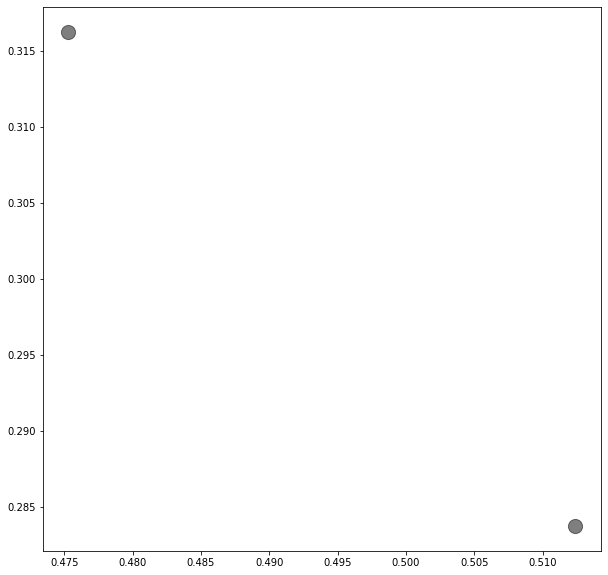

In [504]:
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);